# Az elektron fajlagos töltése - slideshow

## Tartalomjegyzék: 


- A mérés célja
- A mérés menete
- Egy példa kód, és eredmény
- Diszkusszió

## A mérés célja

- Megmérni az elektron fajlagos töltését a Thomson-féle kísérletet megismételve, majd az
elektron töltésének ismeretében kiszámolni az elektron tömegét.

## A mérés menete 

Az adatokat a laborvezető küldte el a távmérés keretein belül, de lemérni az alábbi elgondolás
alapján kellett:

<code style="background:yellow;color:black">A mérés során először kalibráltuk a Helmholtz-tekercseket a Hall-szonda segítségével.</code>


Itt az
I és az U mennyiségeket mérve meghatározhatjuk a mágneses teret, hiszen $B = \alpha U_{Hall}$ , ahol $\alpha = 8.5 \cdot 10^{−2} \frac{mT}{mV}$
, ez pedig segít a k állandó meghatározásában.

Ezután 3 különböző feszültségértéknél megmértük az áramerősség függvényében az átmérőket, ami által meghatározhatóvá vált a fajlagos töltés. Majd reprodukálhatósági mérést végeztünk, hogy tudjunk hibát számolni.

<code style="background:yellow;color:black">Az illesztésekhez pythont használtam.</code>



# Példa arra, hogyan illesztek egyenest a pontjaimra

In [3]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [4]:
adat=loadtxt("U130.txt")
adat1=loadtxt("U170.txt")
adat2=loadtxt("U220.txt")

x=adat[:,0]
y=adat[:,1]

x1=adat1[:,0]
y1=adat1[:,1]

x2=adat2[:,0]
y2=adat2[:,1]

x_=x*1e5
y_=y/1e5

x_1=x1*1e5
y_1=y1/1e5

x_2=x2*1e5
y_2=y2/1e5
size(y)
y_2

array([19.5285038 , 17.86728892, 16.40936778, 15.12287335, 13.98194651,
       12.96542639, 12.05586204, 11.55532769])

a,b,c paraméterek: [13.58130069]
hibak(a,b,c): [-0.88201813 -0.46896096 -0.28327309  0.30078503  0.05337196  0.18511007
  0.10431743  0.40476745]


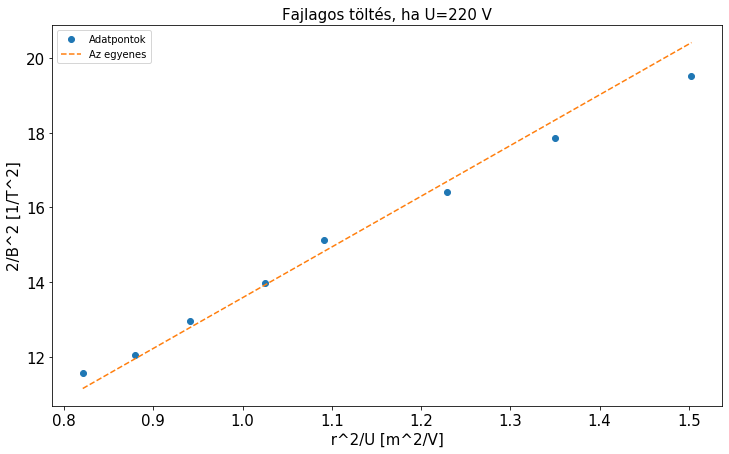

In [9]:

figsize(12,7)
plot(x_2,y_2,'o', label='Adatpontok') 
def opt1egyenes(t,a): #t a változó, a,b paraméterek
    return a*t
popt,pcov=curve_fit(opt1egyenes,x_2[1:],y_2[1:])

print('a,b,c paraméterek:',popt)

plot(linspace(min(x_2),max(x_2),1000),opt1egyenes(linspace(min(x_2),max(x_2),1000), popt[0]),label='Az egyenes', linestyle='dashed')
xticks(fontsize=15)
yticks(fontsize=15)
ylabel('2/B^2 [1/T^2]',fontsize=15)
xlabel(' r^2/U [m^2/V] ',fontsize=15)
title('Fajlagos töltés, ha U=220 V',fontsize=15)
print('hibak(a,b,c):',y_2-opt1egyenes(x_2,popt[0]))
legend()
#plt.savefig('U220.png',bbox_inches="tight")
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.input').show();
 $('div.output_stderr').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action='javascript:code_toggle()'><input STYLE='color: #4286f4' 
type='submit' value='Click here to toggle on/off the raw code.'></form>''')

# Diszkusszió

## Megismerkedtünk a slidehow-val emellett:
A számolásaim alapján az kapott elektrontömeg nagyságrendileg megegyezik az irodalmi
értéktől, és attól csak 12.24%-al tér el, amit én elfogadható eltérésnek tartok a labor eszközeihez
mérten.

# Köszönöm a figyelmet!